In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('summary.csv')

In [4]:
baseline = df.iloc[0]
print(baseline)

status                             ok
partition                           1
bench          baseline:gemm-baseline
bram_used                          44
dsp_used                            3
lut_used                         1535
lutmem_used                       137
reg_used                         2642
uram_used                           0
runtime_avg                   10.4164
runtime_std                0.00853253
Name: 0, dtype: object


In [5]:
info_keys = [ 
    'partition',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [6]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

   partition  lut_used  lutmem_used  bram_used  dsp_used  reg_used  \
0          1  1.000000     1.000000   1.000000       1.0  1.000000   
1          2  0.963518     0.927007   1.045455       1.0  0.956472   
2          3  1.235831     1.284672   1.340909       2.0  1.164269   
3          4  0.974593     0.934307   1.113636       1.0  0.956472   
4          5  1.268404     1.291971   1.386364       2.0  1.162377   
5          6  1.321173     1.291971   1.659091       2.0  1.161998   
6          7  1.311401     1.291971   1.931818       2.0  1.179788   
7          8  1.020847     0.941606   1.113636       1.0  0.956851   
8          9  1.401954     1.299270   1.250000       2.0  1.155185   
9         10  1.444951     1.299270   1.386364       2.0  1.155564   

   runtime_avg  
0     1.000000  
1     1.049282  
2     1.264319  
3     1.050145  
4     1.264231  
5     1.263936  
6     1.263401  
7     1.055630  
8     1.270307  
9     1.271299  


In [7]:
long = pd.melt(normalized_df, id_vars=['partition'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
partition    60 non-null int64
metrics      60 non-null object
values       60 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


Text(0.5, 0, 'Partitioning and Unrolling Factor')

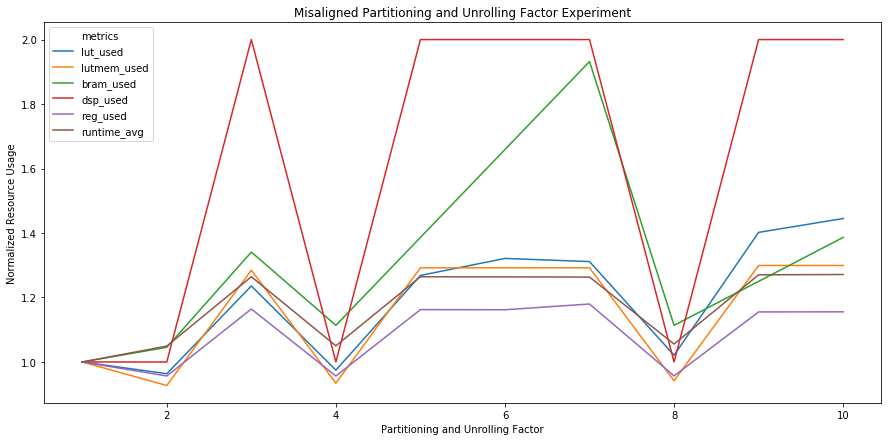

In [8]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='partition', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Partitioning and Unrolling Factor Experiment')
plot.set_ylabel('Normalized Resource Usage')
plot.set_xlabel('Partitioning and Unrolling Factor')

In [9]:
plot.figure.savefig('normalized_resources.png', dpi=300)

<Figure size 432x288 with 0 Axes>

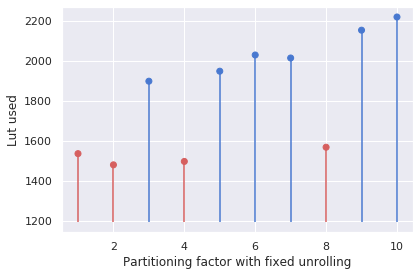

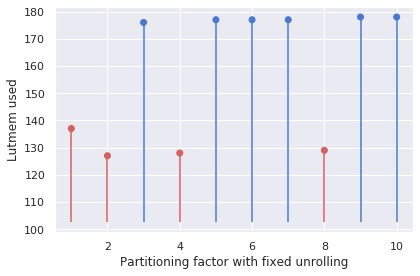

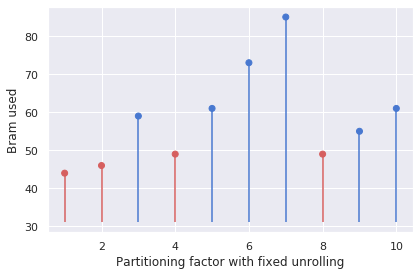

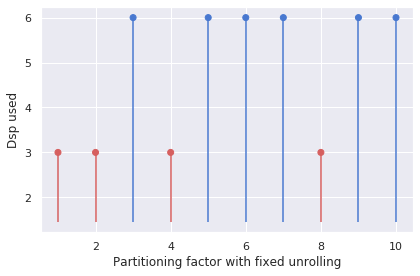

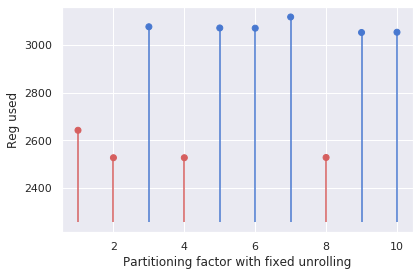

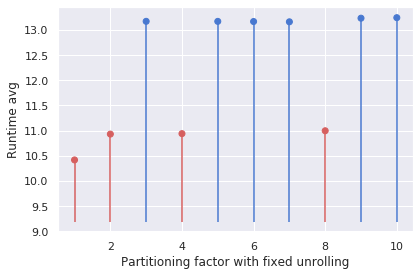

In [59]:
plt.figure()
sns.set()

# Configuration for subplot
pal = sns.color_palette('muted', 8)

for idx, key in enumerate(keys):
    fig = plt.figure()
    # Manually add each point to the current scatter plot.
    # This lets us control the color and shape of point.
    palette = df.apply(lambda row: pal[3] if 128 % row.partition == 0 else pal[0], axis=1)
    markers = df.apply(lambda row: 's' if 128 % row.partition == 0 else 'o', axis=1)
    plt.scatter(x='partition', y=key, data=df, c=palette)
    plt.vlines(x='partition', ymax=key, ymin=df[key].min() - df[key].std(), data=df, colors=palette)
    plt.ylabel(key.replace('_', ' ').capitalize())
    plt.xlabel('Partitioning factor with fixed unrolling')
    fig.tight_layout()
    fig.savefig('absolute-{}.png'.format(key), dpi=100)
    
# fig.suptitle('Misalgined Partitioning w/ Fixed Unrolling - Absolute Resource Usages', y=0.07)

In [ ]:
fig.savefig('absolute.png', dpi=300)